In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np
import random
from scipy.ndimage import rotate

In [ ]:
data_path = '/content/drive/MyDrive/cat_dog_medium'

In [ ]:
categories = os.listdir(data_path)
categories

['cats', 'dogs']

In [ ]:
labels = [i for i in range(len(categories))]
labels

[0, 1]

In [ ]:
label_dict = dict(zip(categories, labels))
label_dict

{'cats': 0, 'dogs': 1}

In [ ]:
img_size = 100
data = []
target = []

# Store images by category for balanced augmentation
data_by_category = {}
for category in categories:
    data_by_category[category] = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    image_names = os.listdir(folder_path)

    for img_name in image_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)

        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size, img_size))
            data.append(resized)
            target.append(label_dict[category])
            data_by_category[category].append(resized)

        except Exception as e:
            print('Exception:', e)

print(f"Original dataset loaded:")
for category in categories:
    count = len(data_by_category[category])
    print(f"{category}: {count} images")
print(f"Total original images: {len(data)}")

Original dataset loaded:
cats: 1000 images
dogs: 1000 images
Total original images: 2000


In [ ]:
# Image Augmentation Functions

def rotate_image(image, angle_range=(-15, 15)):
    """Rotate image by random angle"""
    angle = random.uniform(angle_range[0], angle_range[1])
    rotated = rotate(image, angle, reshape=False, cval=0)
    return rotated.astype(np.uint8)

def flip_horizontal(image):
    """Flip image horizontally"""
    return cv2.flip(image, 1)

def zoom_image(image, zoom_range=(0.8, 1.2)):
    """Apply random zoom to image"""
    zoom_factor = random.uniform(zoom_range[0], zoom_range[1])
    h, w = image.shape

    # Calculate new dimensions
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)

    # Resize image
    resized = cv2.resize(image, (new_w, new_h))

    if zoom_factor > 1:  # Crop center
        start_h = (new_h - h) // 2
        start_w = (new_w - w) // 2
        result = resized[start_h:start_h + h, start_w:start_w + w]
    else:  # Pad with zeros
        result = np.zeros((h, w), dtype=np.uint8)
        start_h = (h - new_h) // 2
        start_w = (w - new_w) // 2
        result[start_h:start_h + new_h, start_w:start_w + new_w] = resized

    return result

def shift_image(image, shift_range=(-10, 10)):
    """Apply random translation to image"""
    shift_x = random.randint(shift_range[0], shift_range[1])
    shift_y = random.randint(shift_range[0], shift_range[1])

    h, w = image.shape
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
    shifted = cv2.warpAffine(image, translation_matrix, (w, h), borderValue=0)

    return shifted

def adjust_brightness(image, brightness_range=(0.7, 1.3)):
    """Adjust image brightness"""
    brightness_factor = random.uniform(brightness_range[0], brightness_range[1])
    adjusted = image.astype(np.float32) * brightness_factor
    adjusted = np.clip(adjusted, 0, 255)
    return adjusted.astype(np.uint8)

# List of augmentation functions
augmentation_functions = [rotate_image, flip_horizontal, zoom_image, shift_image, adjust_brightness]
augmentation_names = ['rotation', 'horizontal_flip', 'zoom', 'shift', 'brightness']

In [ ]:
# Data Augmentation Process

print("\n=== STARTING DATA AUGMENTATION ===")
print(f"Number of samples BEFORE augmentation: {len(data)}")

augmented_data = []
augmented_targets = []
augmentation_count = 0

for category in categories:
    category_images = data_by_category[category]
    category_label = label_dict[category]

    # Select 50% of images from this category for augmentation
    num_to_augment = len(category_images) // 2
    selected_images = random.sample(category_images, num_to_augment)

    print(f"\nAugmenting {num_to_augment} images from category '{category}'")

    for i, img in enumerate(selected_images):
        # Apply each augmentation technique
        for j, aug_func in enumerate(augmentation_functions):
            try:
                augmented_img = aug_func(img.copy())
                augmented_data.append(augmented_img)
                augmented_targets.append(category_label)
                augmentation_count += 1

                if (i * len(augmentation_functions) + j + 1) % 50 == 0:
                    print(f"  Processed {i * len(augmentation_functions) + j + 1} augmentations for {category}")

            except Exception as e:
                print(f"  Error in {augmentation_names[j]} augmentation: {e}")

print(f"\nTotal augmented images created: {augmentation_count}")

# Combine original and augmented data
combined_data = data + augmented_data
combined_targets = target + augmented_targets

print(f"\n=== AUGMENTATION SUMMARY ===")
print(f"Original images: {len(data)}")
print(f"Augmented images: {len(augmented_data)}")
print(f"Total images AFTER augmentation: {len(combined_data)}")
print(f"Augmentation ratio: {len(augmented_data)/len(data):.2f}x")


=== STARTING DATA AUGMENTATION ===
Number of samples BEFORE augmentation: 2000

Augmenting 500 images from category 'cats'
  Processed 50 augmentations for cats
  Processed 100 augmentations for cats
  Processed 150 augmentations for cats
  Processed 200 augmentations for cats
  Processed 250 augmentations for cats
  Processed 300 augmentations for cats
  Processed 350 augmentations for cats
  Processed 400 augmentations for cats
  Processed 450 augmentations for cats
  Processed 500 augmentations for cats
  Processed 550 augmentations for cats
  Processed 600 augmentations for cats
  Processed 650 augmentations for cats
  Processed 700 augmentations for cats
  Processed 750 augmentations for cats
  Processed 800 augmentations for cats
  Processed 850 augmentations for cats
  Processed 900 augmentations for cats
  Processed 950 augmentations for cats
  Processed 1000 augmentations for cats
  Processed 1050 augmentations for cats
  Processed 1100 augmentations for cats
  Processed 1150

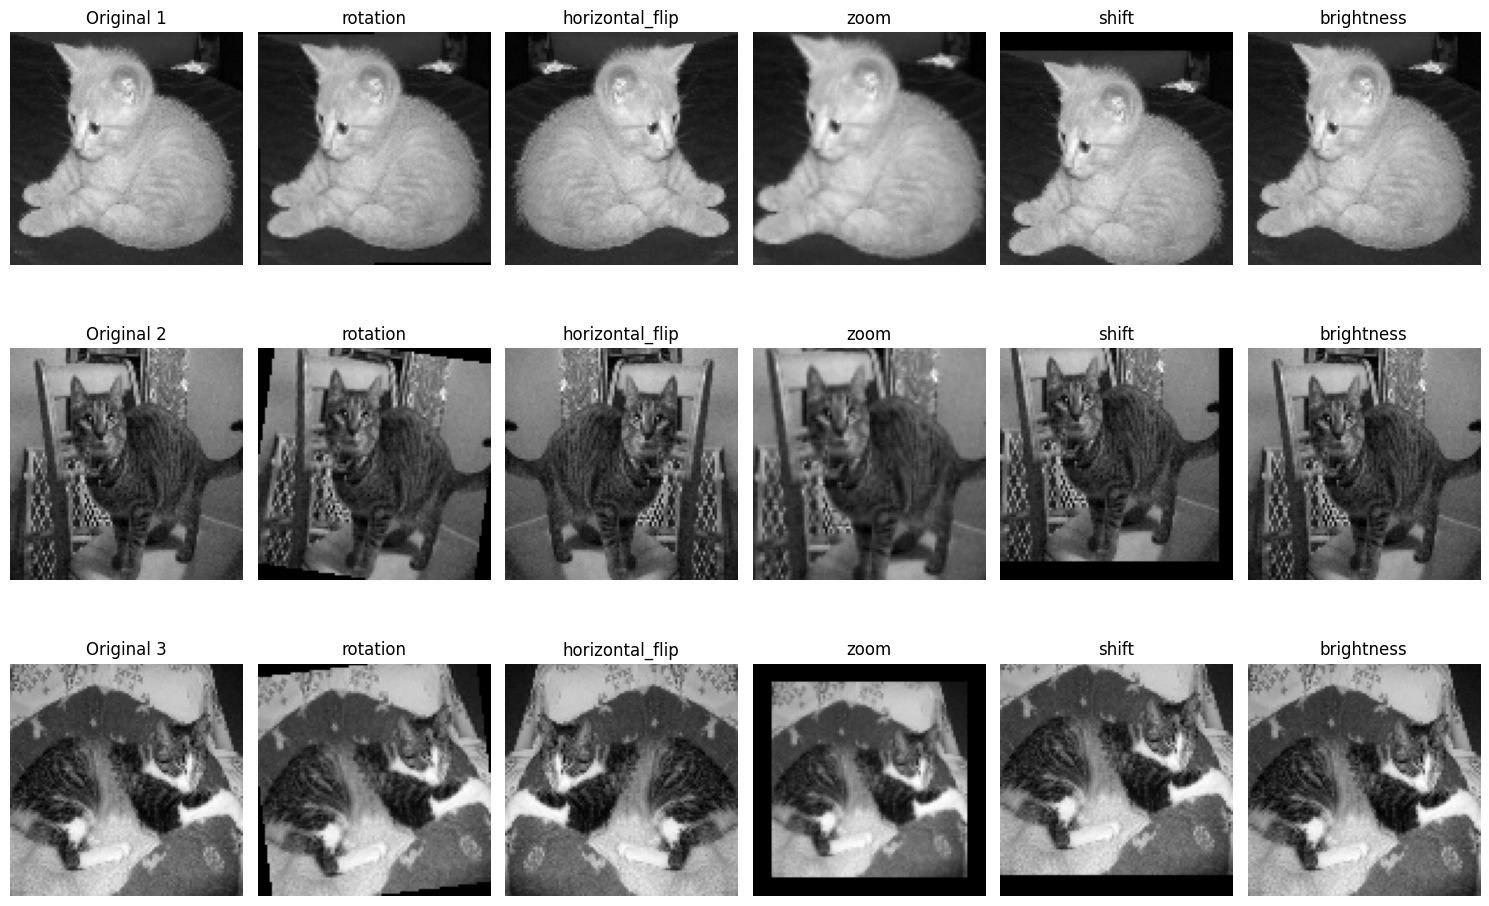

In [ ]:
# Display some original and augmented samples
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Show original images
for i in range(3):
    plt.subplot(3, 6, i*6 + 1)
    plt.imshow(data[i], cmap="gray")
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Show augmented versions
    original_img = data[i]
    for j, (aug_func, aug_name) in enumerate(zip(augmentation_functions, augmentation_names)):
        plt.subplot(3, 6, i*6 + j + 2)
        aug_img = aug_func(original_img.copy())
        plt.imshow(aug_img, cmap="gray")
        plt.title(f"{aug_name}")
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Normalize and reshape the combined data
combined_data = np.array(combined_data) / 255.0
combined_data = np.reshape(combined_data, (combined_data.shape[0], img_size, img_size, 1))
combined_targets = np.array(combined_targets)

print(f"Final data shape: {combined_data.shape}")
print(f"Final targets shape: {combined_targets.shape}")


Final data shape: (7000, 100, 100, 1)
Final targets shape: (7000,)


In [ ]:
from tensorflow.keras.utils import to_categorical
new_target = to_categorical(combined_targets)
print(f"One-hot encoded targets shape: {new_target.shape}")

One-hot encoded targets shape: (7000, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(combined_data, new_target, test_size=0.1, random_state=42)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")
print(f"Shape of an image in train_data: {x_train[0].shape}")
print(f"Shape of an image in test_data: {x_test[0].shape}")

Training set size: 6300
Test set size: 700
Shape of an image in train_data: (100, 100, 1)
Shape of an image in test_data: (100, 100, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(200, (3, 3), input_shape=combined_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

print("Model architecture:")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 200)    │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 200)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 100)    │       180,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │     2,645,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,827,252 (10.79 MB)

 Trainable params: 2,827,252 (10.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model compiled successfully!")

Model compiled successfully!


In [ ]:
print("Starting model training...")
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, validation_split=0.2, batch_size=32)
print("Training completed!")

Starting model training...
Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.5193 - loss: 0.6978 - val_accuracy: 0.5229 - val_loss: 0.6830
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5943 - loss: 0.6635 - val_accuracy: 0.6171 - val_loss: 0.6501
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.6682 - loss: 0.6154 - val_accuracy: 0.6671 - val_loss: 0.5960
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7071 - loss: 0.5566 - val_accuracy: 0.6900 - val_loss: 0.5606
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.7632 - loss: 0.4836 - val_accuracy: 0.7286 - val_loss: 0.5238
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.8234 - loss: 0.3963 - val_accuracy: 0.7429 - val_loss: 0.4932
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.8531 - loss: 0.3347 - val_accuracy: 0.7800 - val_loss: 0.4643
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.88

In [ ]:
print("Model evaluation on test set:")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Model evaluation on test set:
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7964 - loss: 0.5387
Test Loss: 0.5214
Test Accuracy: 0.8043


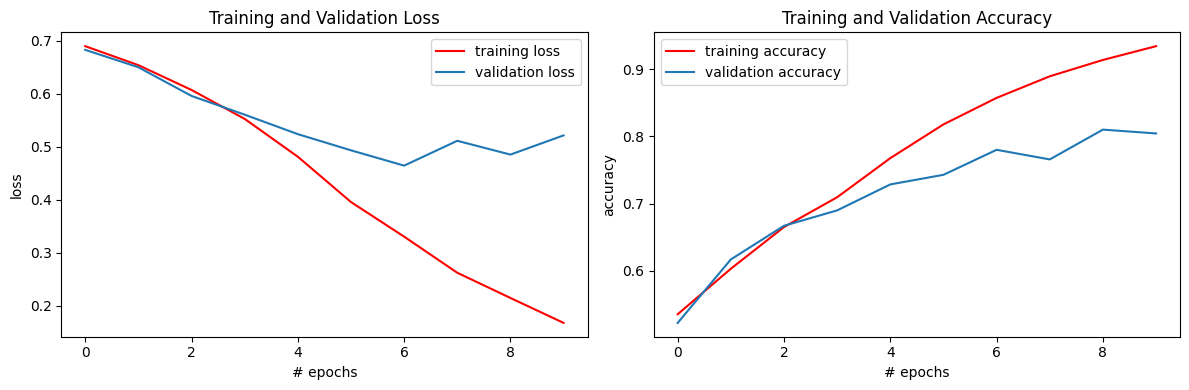

In [ ]:
from matplotlib import pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'r', label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r', label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions
y_predicted = model.predict(x_test)
y_predicted_classes = np.argmax(y_predicted, axis=1)
y_actual = np.argmax(y_test, axis=1)

print(f"Prediction probabilities shape: {y_predicted.shape}")
print(f"Predicted classes shape: {y_predicted_classes.shape}")
print(f"Actual classes shape: {y_actual.shape}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Prediction probabilities shape: (700, 2)
Predicted classes shape: (700,)
Actual classes shape: (700,)


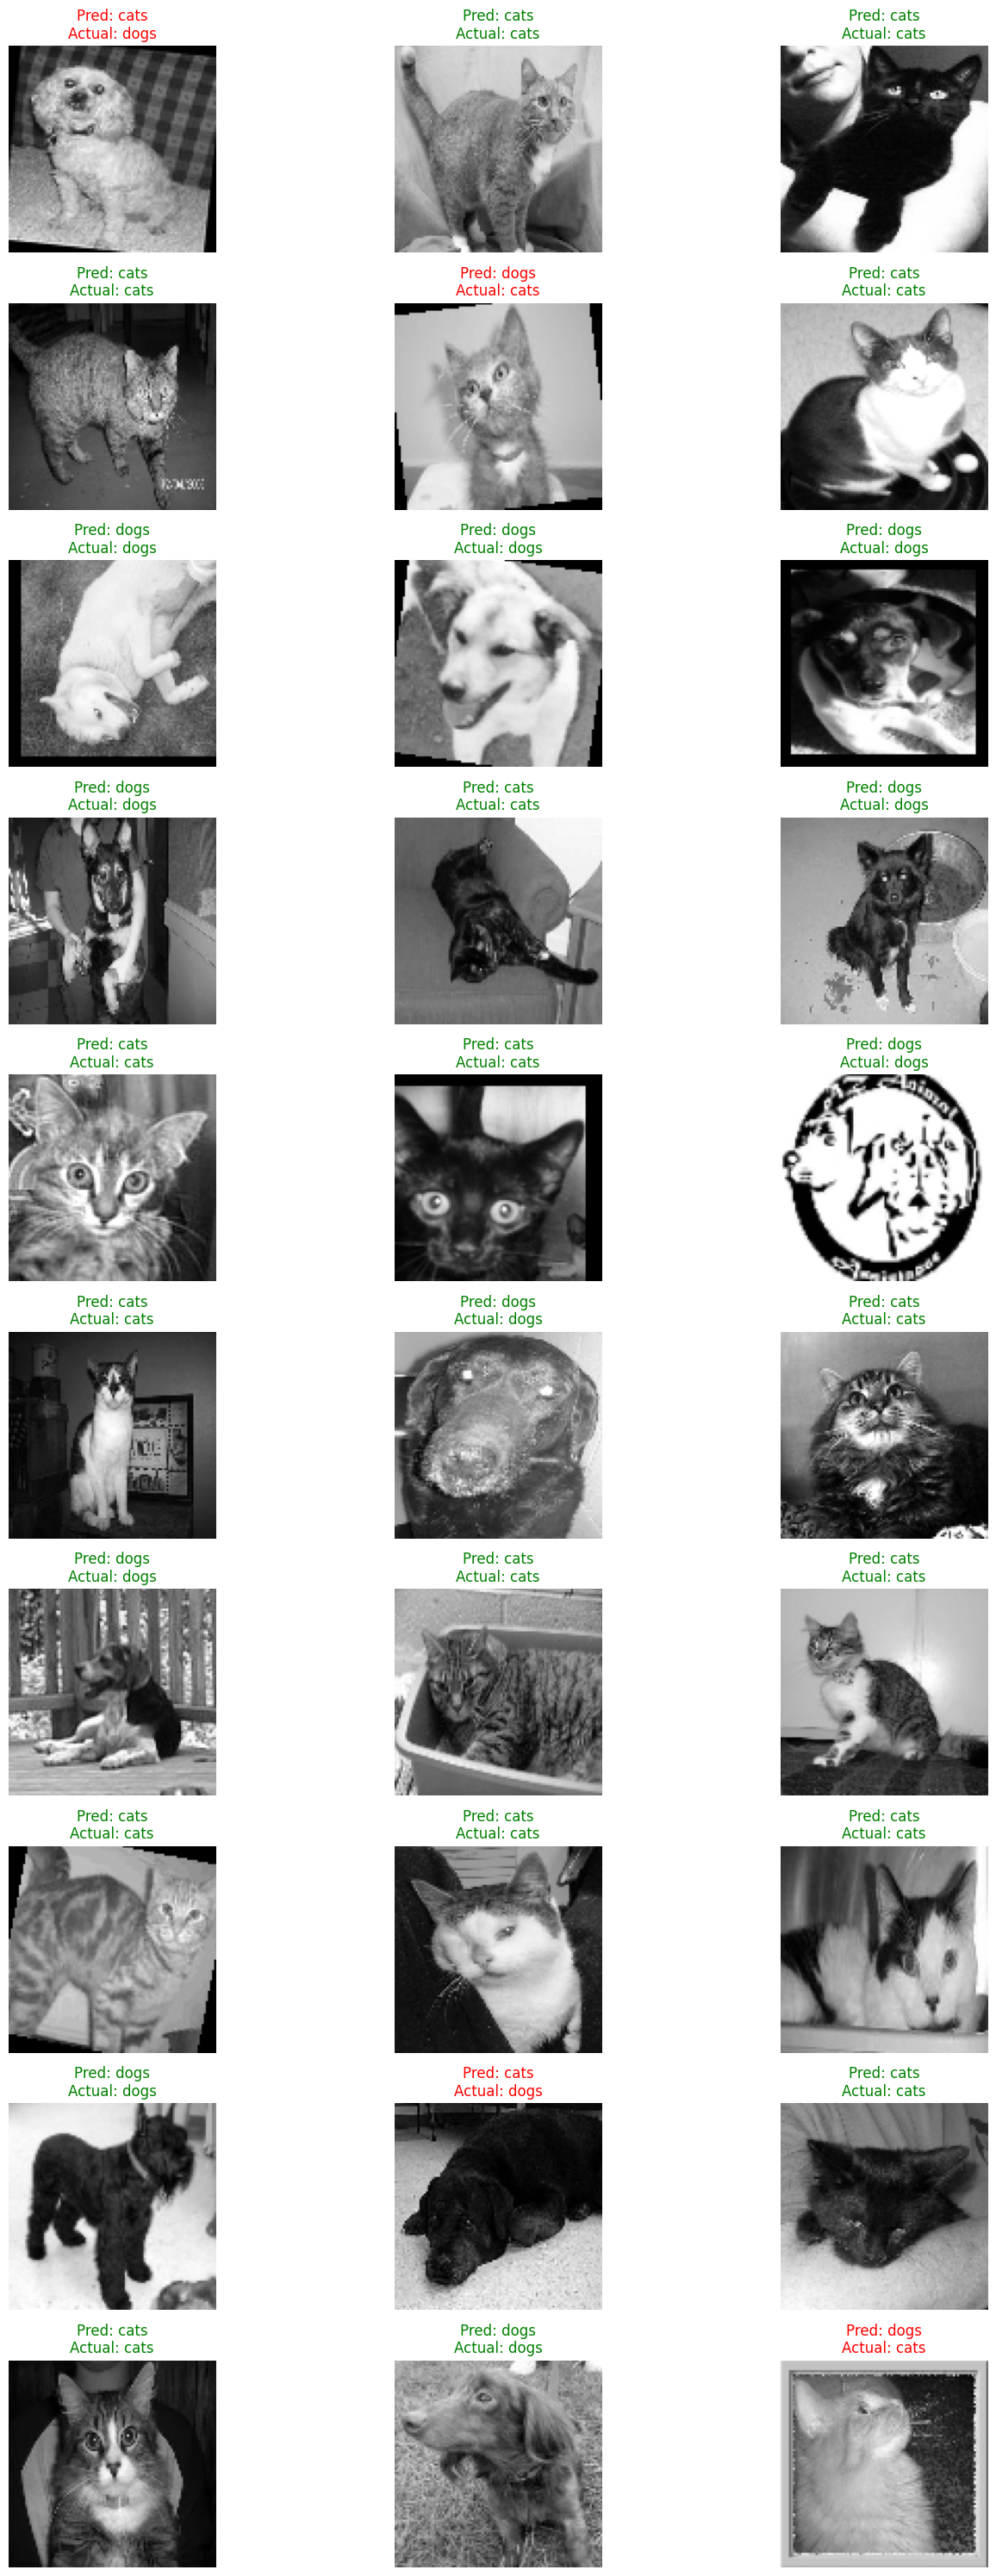

In [ ]:
# Visualize predictions
L = 10
W = 3
fig, axes = plt.subplots(L, W, figsize=(15, 30))
axes = axes.ravel()

for i in np.arange(0, L * W):
    if i < len(x_test):
        axes[i].imshow(x_test[i].reshape(img_size, img_size), cmap='gray')

        # Get category names for display
        pred_category = list(label_dict.keys())[y_predicted_classes[i]]
        actual_category = list(label_dict.keys())[y_actual[i]]

        # Color code: green for correct, red for incorrect
        color = 'green' if y_predicted_classes[i] == y_actual[i] else 'red'

        axes[i].set_title(f"Pred: {pred_category}\nActual: {actual_category}", color=color)
        axes[i].axis('off')
    else:
        axes[i].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

        cats       0.79      0.82      0.80       341
        dogs       0.82      0.79      0.81       359

    accuracy                           0.80       700
   macro avg       0.80      0.80      0.80       700
weighted avg       0.81      0.80      0.80       700



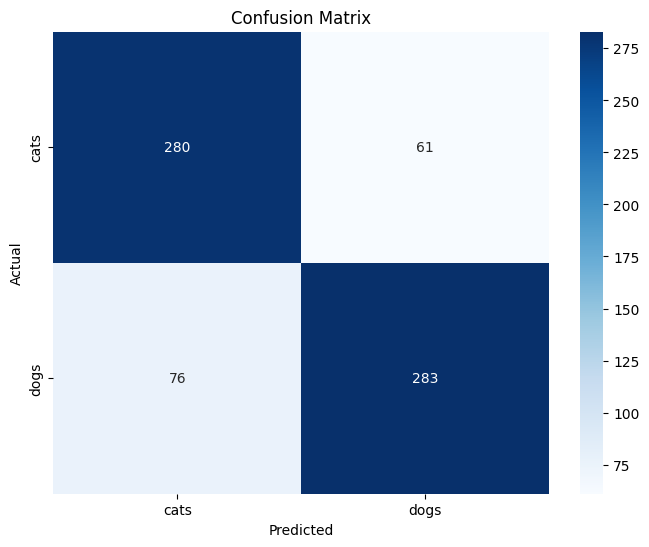


=== FINAL SUMMARY ===
Total training samples (with augmentation): 6300
Test accuracy: 0.8043
Data augmentation helped increase training samples by 5000 images


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report
print("Classification Report:")
print(classification_report(y_actual, y_predicted_classes, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_actual, y_predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\n=== FINAL SUMMARY ===")
print(f"Total training samples (with augmentation): {len(x_train)}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Data augmentation helped increase training samples by {len(augmented_data)} images")